In [1]:
# CIND 820 - D10: Big Data Analytics Project
# Title: Telco Customer Churn Prediction
# Subtitle: Initial Results and the Code
# Student Name: Sei Ryun Kim
# Student Number: 500286795
# Supervisor's Name: Dr. M. Bilgehan Erdem

In [2]:
# 5 steps of approach for the project

In [3]:
# Step 1: Initial Data Analysis

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read csv file data

telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Information of data

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Display the number of unique values

telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# Describe data for statistical measures

telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Step 2: Data Preparation

In [10]:
# Drop customerID because customerID has unique values and it does not affect churn prediction

telco = telco.drop('customerID', axis = 1)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Convert the type of TotalCharges from object to float64

telco['TotalCharges'].dtype

dtype('O')

In [12]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors = "coerce")

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# Check if there are any missing values

telco.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# Check if there are any null values

telco.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# Remove all the rows which have any null values

telco.drop(telco[telco['TotalCharges'].isnull()].index, inplace = True)
telco.reset_index(drop = True, inplace = True)

In [17]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Step 3: Exploratory Data Analysis

In [19]:
# Types of correlation

In [20]:
# Pearson correlation

corrmatrix1 = telco.corr(method = 'pearson')
print(corrmatrix1)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


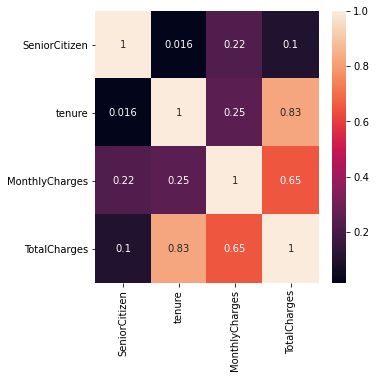

In [21]:
# Visualization of Pearson correlation

plt.figure(figsize = (5, 5))
sns.heatmap(corrmatrix1, annot = True)
plt.show()

In [22]:
# Spearman correlation

corrmatrix2 = telco.corr(method = 'spearman')
print(corrmatrix2)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.017408        0.220737      0.107248
tenure               0.017408  1.000000        0.275339      0.889177
MonthlyCharges       0.220737  0.275339        1.000000      0.638032
TotalCharges         0.107248  0.889177        0.638032      1.000000


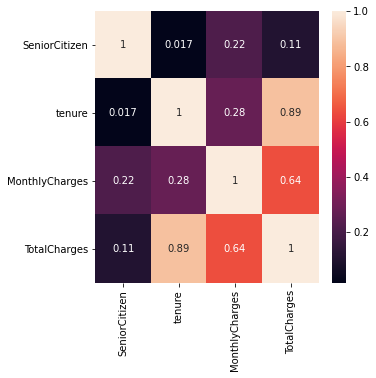

In [23]:
# Visualization of Spearman correlation

plt.figure(figsize = (5, 5))
sns.heatmap(corrmatrix2, annot = True)
plt.show()

In [24]:
# Kendall correlation

corrmatrix3 = telco.corr(method = 'kendall')
print(corrmatrix3)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.014369        0.180366      0.087575
tenure               0.014369  1.000000        0.189785      0.734016
MonthlyCharges       0.180366  0.189785        1.000000      0.459904
TotalCharges         0.087575  0.734016        0.459904      1.000000


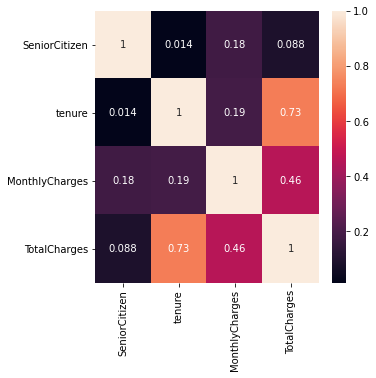

In [25]:
# Visualization of Kendall correlation

plt.figure(figsize = (5, 5))
sns.heatmap(corrmatrix3, annot = True)
plt.show()

In [26]:
# Count the values of gender

telco.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [27]:
# Count the values of senior citizen

telco.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [28]:
# Count the values of dependents

telco.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [29]:
# Count the values of phone service

telco.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [30]:
# Count the values of multiple lines

telco.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [31]:
# Count the values of internet service

telco.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [32]:
# Count the values of online security

telco.OnlineSecurity.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [33]:
# Count the values of online backup

telco.OnlineBackup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [34]:
# Count the values of device protection

telco.DeviceProtection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [35]:
# Count the values of tech support

telco.TechSupport.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [36]:
# Count the values of streaming TV

telco.StreamingTV.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [37]:
# Count the values of streaming movies

telco.StreamingMovies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [38]:
# Count the values of contract

telco.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [39]:
# Count the values of paperless billing

telco.PaperlessBilling.value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [40]:
# Count the values of payment method

telco.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [41]:
# Count the values of churn

telco.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [42]:
print ('Churn Percentages are\n', telco.Churn.value_counts() / telco.Churn.count())

Churn Percentages are
 No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


No handles with labels found to put in legend.


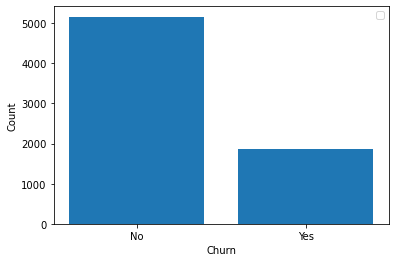

In [43]:
# Visualization of churn value count

plt.bar(x = telco['Churn'].unique(), height = telco.Churn.value_counts())
plt.legend()
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [44]:
# Demographic

# How do demographics including gender, partner and dependents affect to churn?

telco.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size()

telco.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name = 'Count')

,gender,Partner,Dependents,Churn,Count
0,Female,No,No,No,1068
1,Female,No,No,Yes,587
2,Female,No,Yes,No,112
3,Female,No,Yes,Yes,33
4,Female,Yes,No,No,618
5,Female,Yes,No,Yes,187
6,Female,Yes,Yes,No,746
7,Female,Yes,Yes,Yes,132
8,Male,No,No,No,1089
9,Male,No,No,Yes,536


In [45]:
telco.groupby(['SeniorCitizen', 'Churn']).size()

telco.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name = 'Count')

,SeniorCitizen,Churn,Count
0,0,No,4497
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


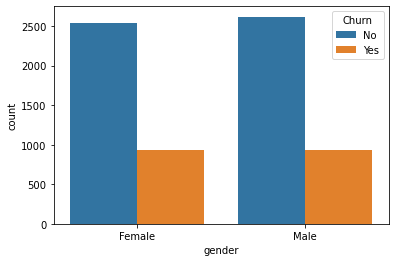

In [46]:
# Visualization how gender affects churn

sns.countplot(x = 'gender', hue = 'Churn', data = telco);

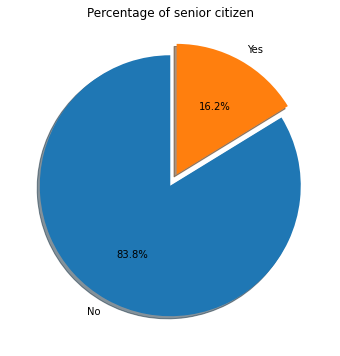

In [47]:
# Visualization of senior citizen percentage

plt.figure(figsize = (8, 6))
sizes = telco.SeniorCitizen.value_counts()
labels = ['No', 'Yes']
explode = (0, 0.1,)

plt.title('Percentage of senior citizen')
plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.show()

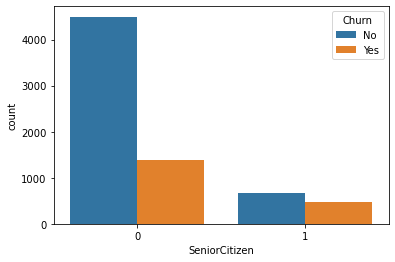

In [48]:
# Visualization how senior citizen affects churn

sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = telco);

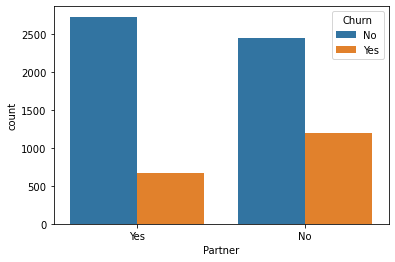

In [49]:
# Visualization how partner affects churn

sns.countplot(x = 'Partner', hue = 'Churn', data = telco);

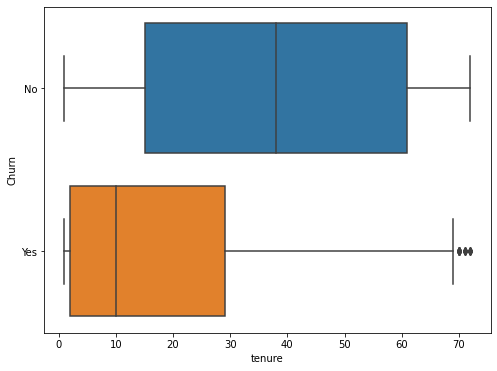

In [50]:
# Visualization how tenure affects churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'tenure', y = 'Churn', data = telco);

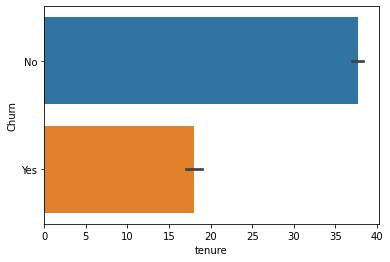

In [51]:
sns.barplot(data = telco, x = 'tenure', y = 'Churn')

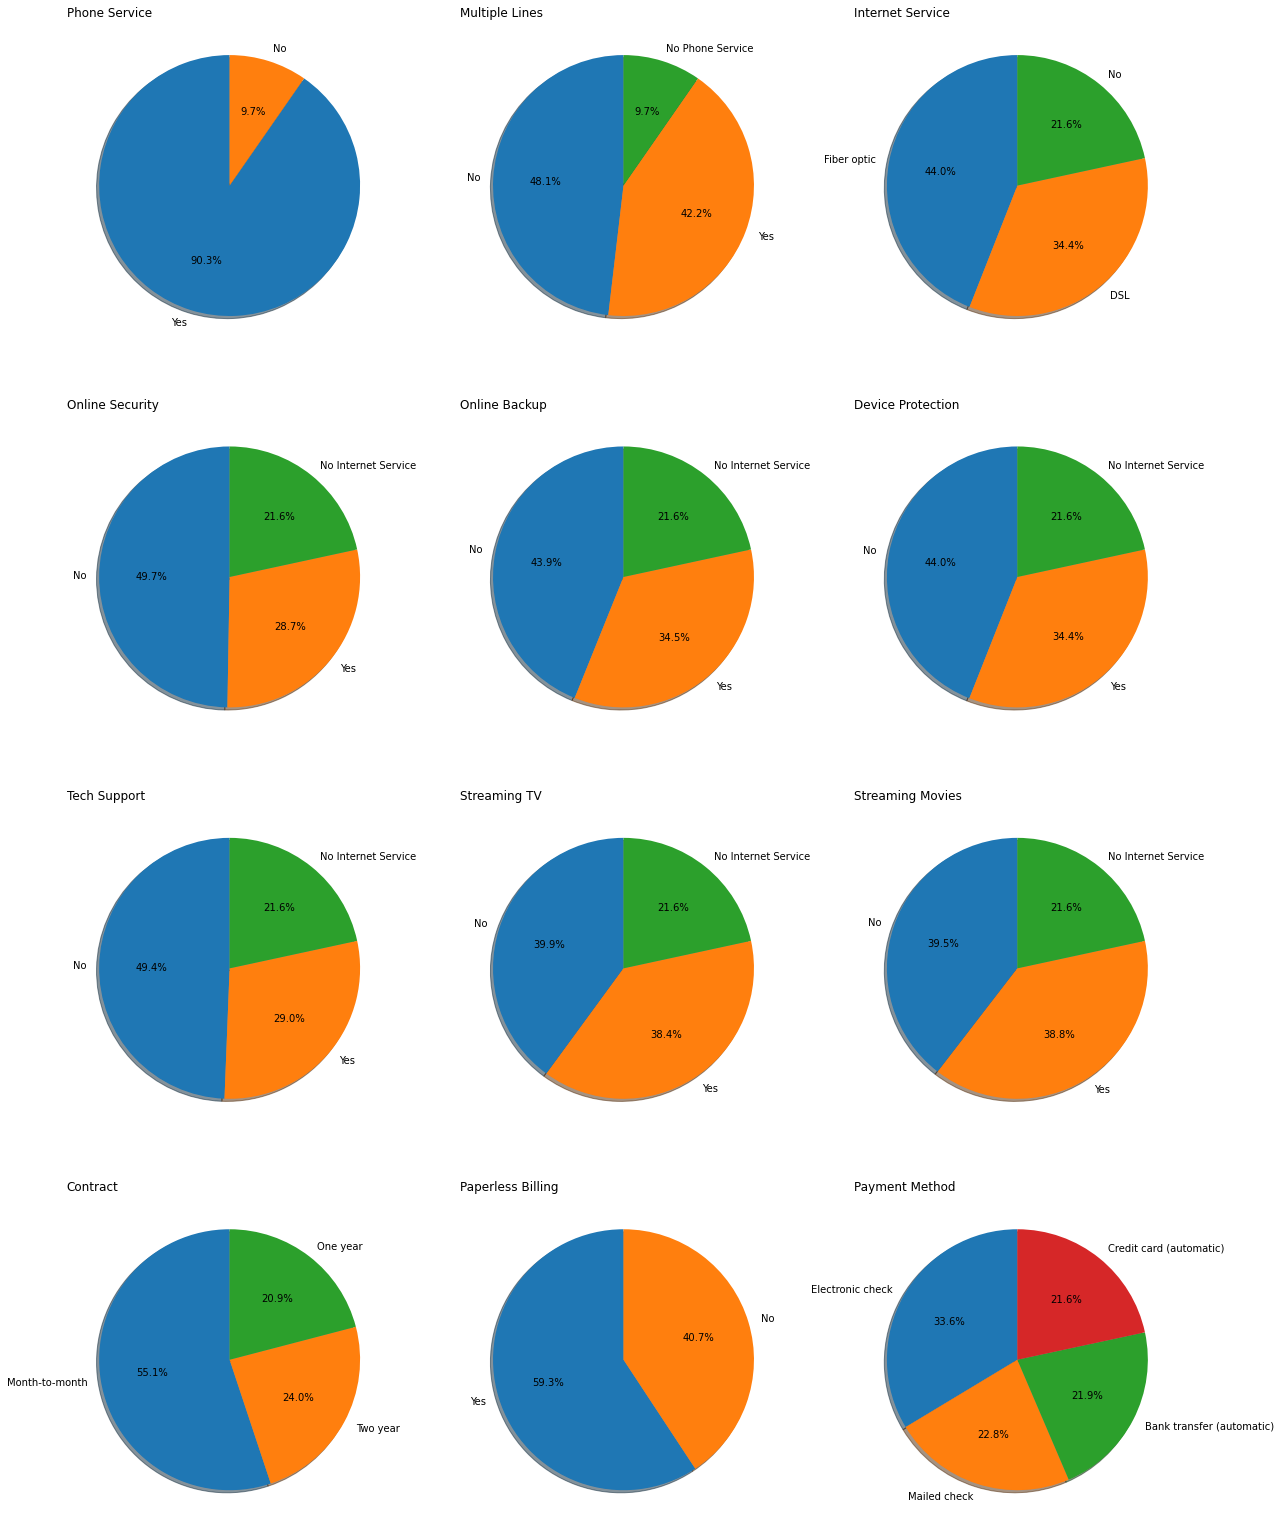

In [52]:
# Visualizations of percentage for phone services, internet services, and payment methods

plt.figure(figsize = (20, 42))

plt.subplot(6, 3, 1)
sizes = telco.PhoneService.value_counts()
labels = ['Yes', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Phone Service', loc = 'left')

plt.subplot(6, 3, 2)
sizes = telco.MultipleLines.value_counts()
labels = ['No', 'Yes', 'No Phone Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Multiple Lines', loc = 'left')

plt.subplot(6, 3, 3)
sizes = telco.InternetService.value_counts()
labels = ['Fiber optic', 'DSL', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Internet Service', loc = 'left')

plt.subplot(6, 3, 4)
sizes = telco.OnlineSecurity.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Online Security', loc = 'left')

plt.subplot(6, 3, 5)
sizes = telco.OnlineBackup.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Online Backup', loc = 'left')

plt.subplot(6, 3, 6)
sizes = telco.DeviceProtection.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Device Protection', loc = 'left')

plt.subplot(6, 3, 7)
sizes = telco.TechSupport.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Tech Support', loc = 'left')

plt.subplot(6, 3, 8)
sizes = telco.StreamingTV.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Streaming TV', loc = 'left')

plt.subplot(6, 3, 9)
sizes = telco.StreamingMovies.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Streaming Movies', loc = 'left')

plt.subplot(6, 3, 10)
sizes = telco.Contract.value_counts()
labels = ['Month-to-month', 'Two year', 'One year']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Contract', loc = 'left')

plt.subplot(6, 3, 11)
sizes = telco.PaperlessBilling.value_counts()
labels = ['Yes', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Paperless Billing', loc = 'left')

plt.subplot(6, 3, 12)
sizes = telco.PaymentMethod.value_counts()
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
plt.pie(sizes, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Payment Method', loc = 'left');

In [53]:
columns = {'PhoneService' : 1, 'MultipleLines' : 2, 'InternetService' : 3, 'OnlineSecurity' : 4, 'OnlineBackup' : 5, 'DeviceProtection' : 6,
          'TechSupport' : 7, 'StreamingTV' : 8, 'StreamingMovies' : 9, 'Contract' : 10, 'PaperlessBilling' : 11, 'PaymentMethod' : 12}

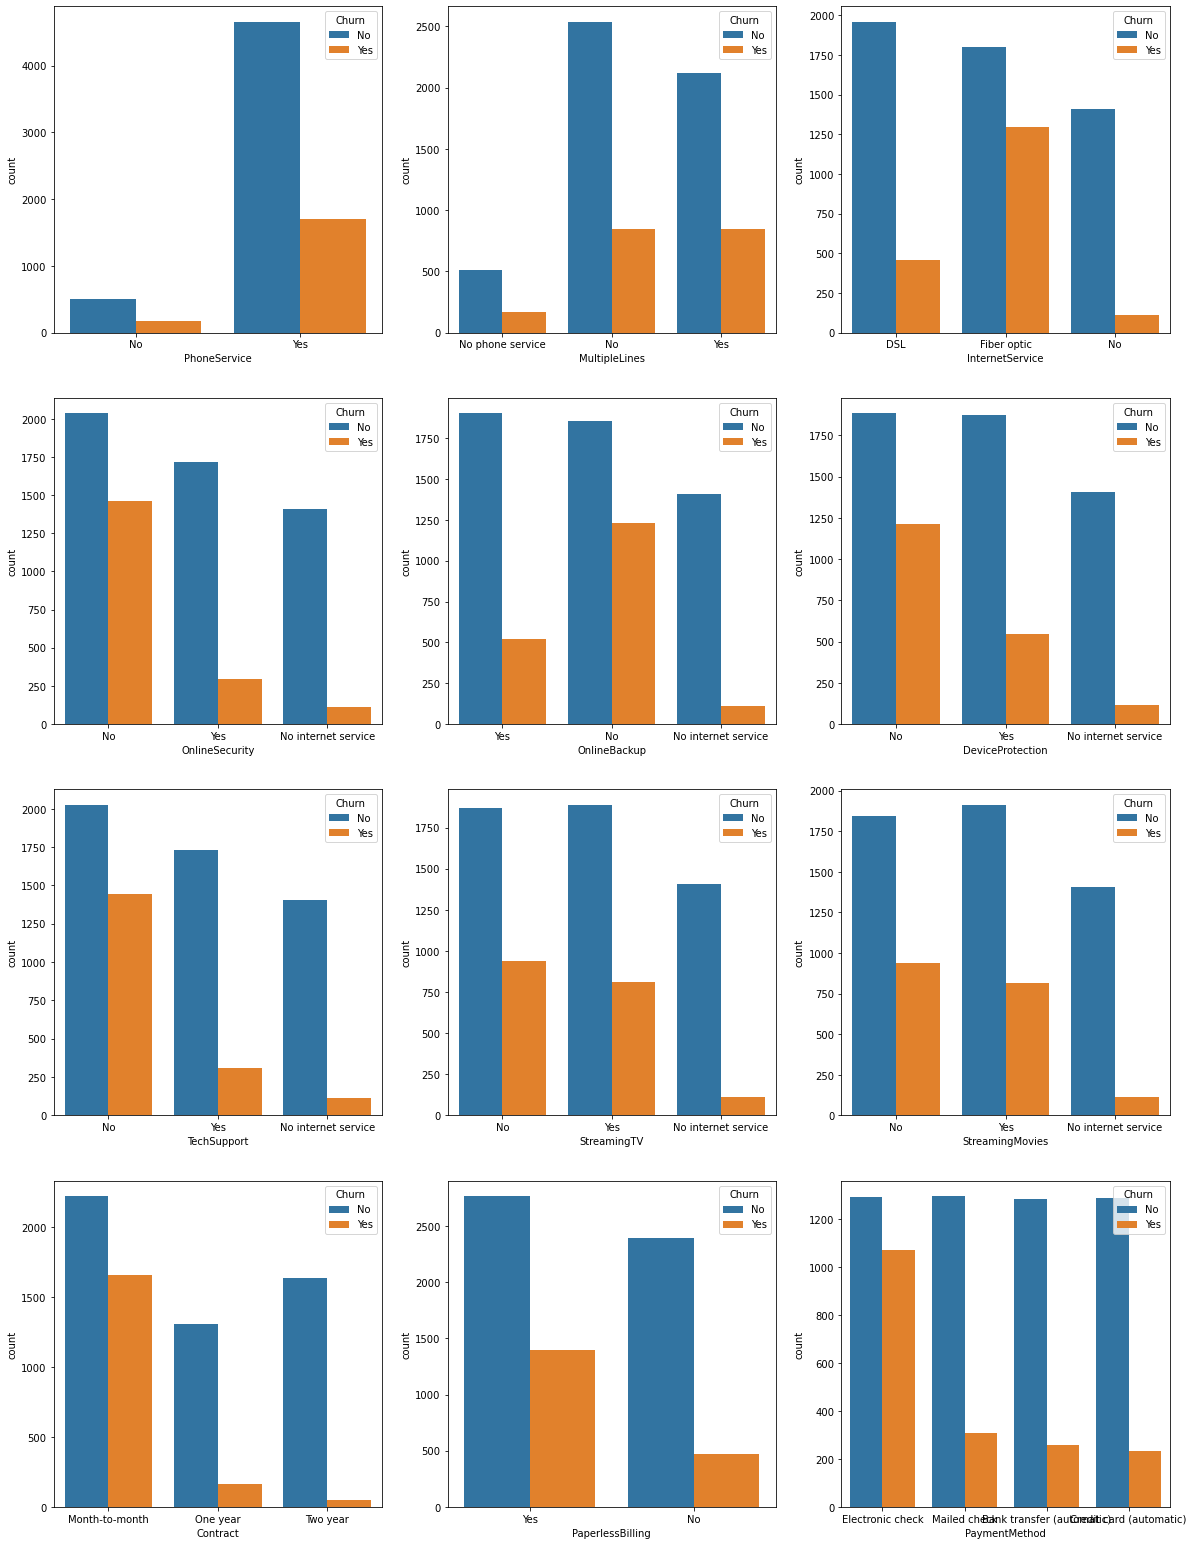

In [54]:
# Visualizations how phone services, internet services, and payment methods affect churn

plt.figure(figsize = (20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x = key, hue = 'Churn', data = telco)

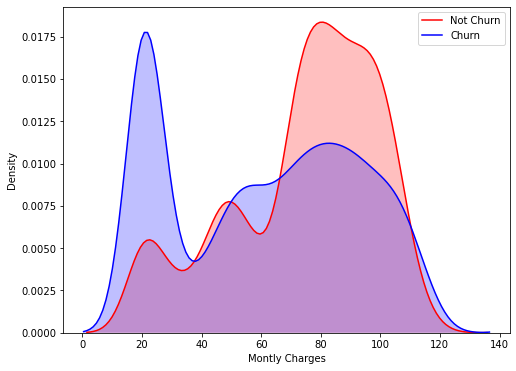

In [55]:
# Visualization how monthly charges affect churn

plt.figure(figsize = (8, 6))
sns.kdeplot(telco[telco['Churn'] == 'Yes']['MonthlyCharges'], color = 'red', shade = True)
sns.kdeplot(telco[telco['Churn'] == 'No']['MonthlyCharges'], color = 'blue', shade = True)
plt.xlabel('Montly Charges')
plt.ylabel('Density')
plt.legend(['Not Churn', 'Churn'], loc = 'upper right');

In [56]:
telco.TotalCharges.dtype

dtype('float64')

In [57]:
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors = 'coerce')

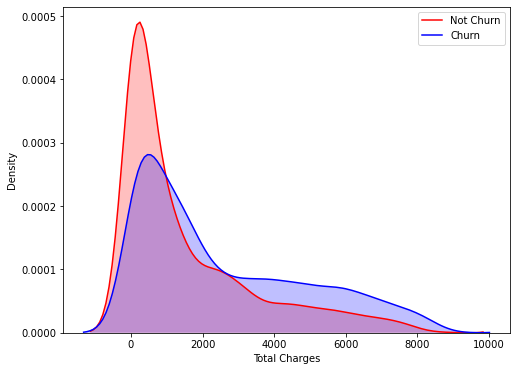

In [58]:
# Visualization how total charges affect churn

plt.figure(figsize = (8, 6))
sns.kdeplot(telco[telco['Churn'] == 'Yes']['TotalCharges'], color = 'red', shade = True)
sns.kdeplot(telco[telco['Churn'] == 'No']['TotalCharges'], color = 'blue', shade = True)
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend(['Not Churn', 'Churn'],loc = 'upper right');

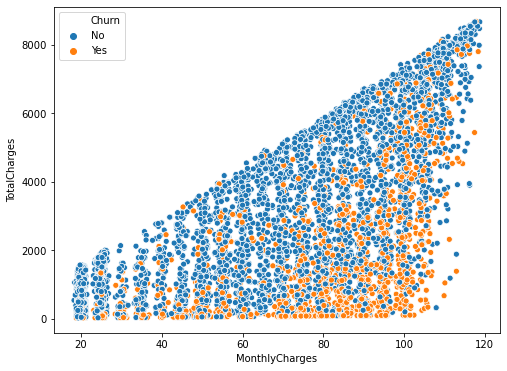

In [59]:
# Visualization of comparison between monthly charges and total charges regarding churn

plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', data = telco);

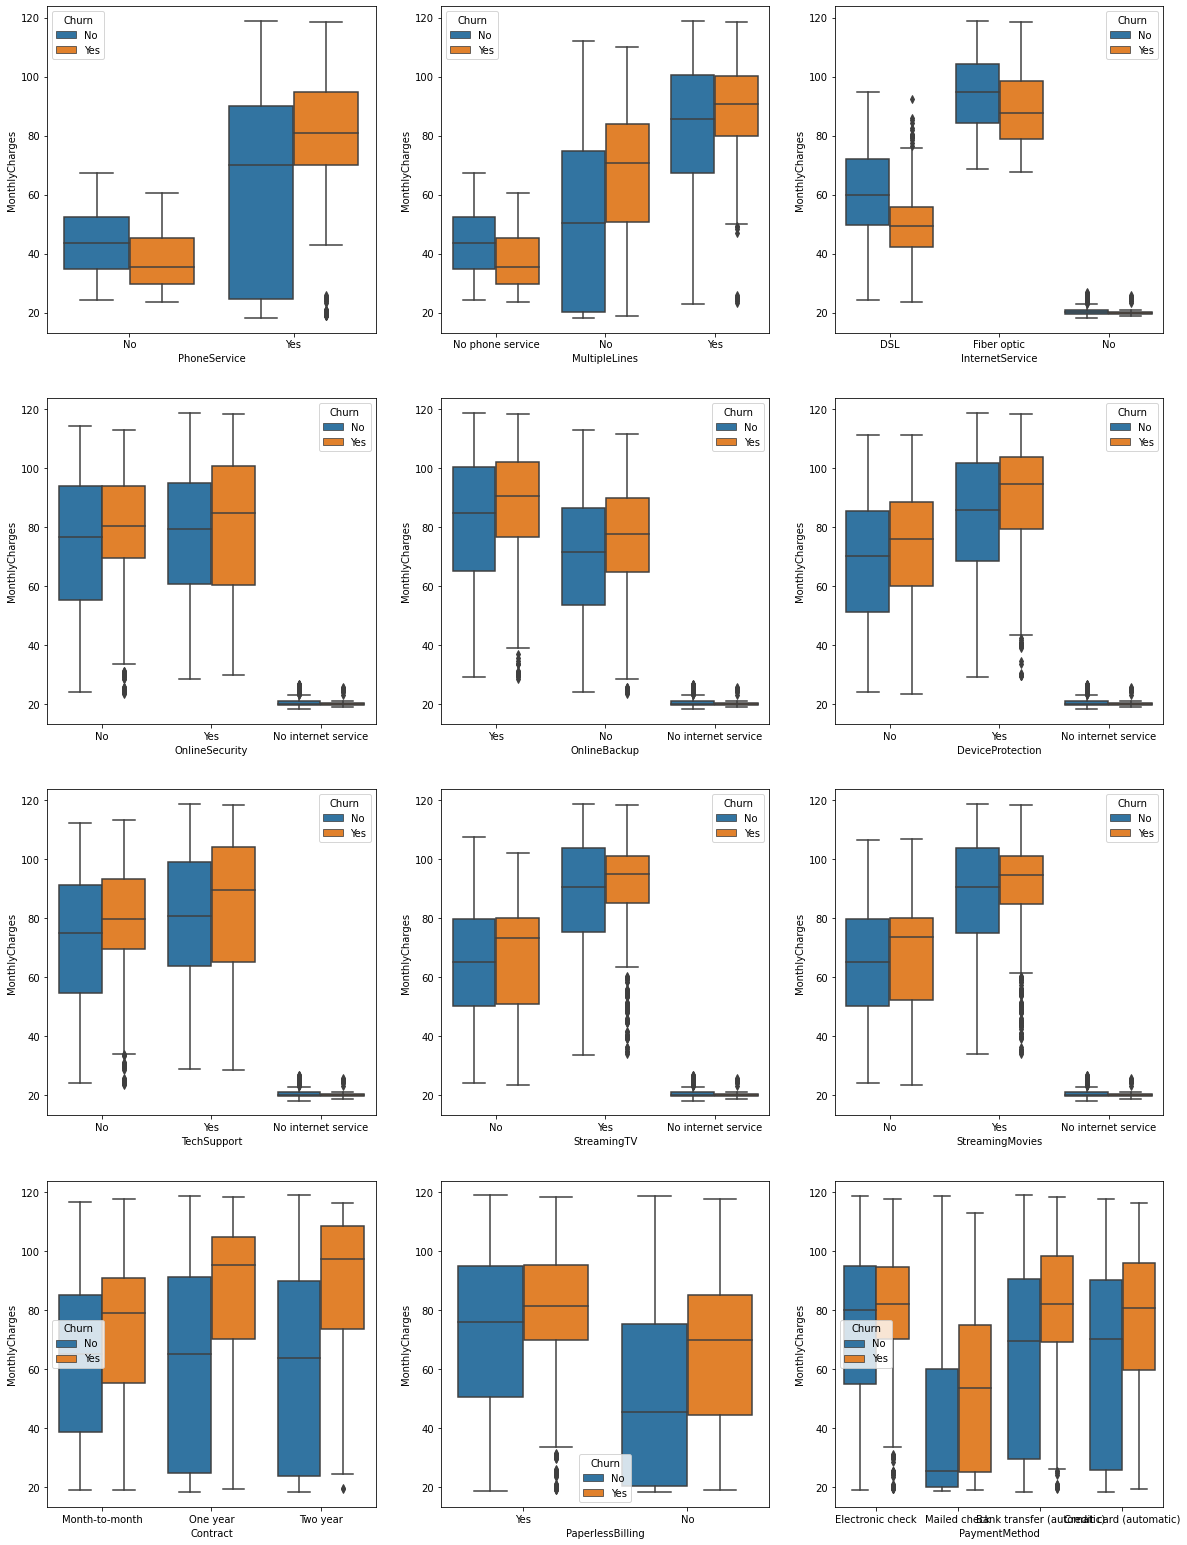

In [60]:
# Visualization of comparison between services and monthly charges regarding churn

plt.figure(figsize = (20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.boxplot(x = key, y = 'MonthlyCharges', hue = 'Churn', data = telco);

In [61]:
# Drop customerID variable
# Replace 'Yes' to 1 and 'No' to 0 for Churn variable

telco['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
telco['Churn'].replace(to_replace = 'No', value = 0, inplace = True)
telco = pd.get_dummies(telco)

In [62]:
telco.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [63]:
telco.shape

(7032, 46)

In [64]:
# Step 4: Building Predictive Models

In [65]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [66]:
X = telco.drop(columns = ['Churn'])
y = telco['Churn'].values

In [67]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [68]:
# Scale the data
# Normalization

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [69]:
X

array([[-0.44032709, -1.28024804, -1.16169394, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.06430269, -0.26087792, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -1.23950408, -0.36392329, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709, -0.87280842, -1.17000405, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902, -1.15801615,  0.31916782, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709,  1.36810945,  1.35793167, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 45), (1407, 45), (5625,), (1407,))

In [72]:
# Build a predictive model for Logistic Regression

In [73]:
# Import Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [74]:
# Create a model for Logistic Regression

model_lr = LogisticRegression(max_iter = 120, random_state = 0, n_jobs = 20)

In [75]:
# Model training for Logistic Regression

model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=20, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [76]:
# Make a prediction for Logistic Regression

pred_lr = model_lr.predict(X_test)

In [77]:
# Build a predictive model for Decision Tree

In [78]:
# Import Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [79]:
# Create a model for Decision Tree

model_dt = DecisionTreeClassifier(max_depth = 4, random_state = 42)

In [80]:
# Model training for Decision Tree

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [81]:
# Make a prediction for Decision Tree

pred_dt = model_dt.predict(X_test)

In [82]:
# Build a predictive model for Random Forest

In [83]:
# Import Random Forest

from sklearn.ensemble import RandomForestClassifier

In [84]:
# Create a model for Random Forest

model_rf = RandomForestClassifier(n_estimators = 300, min_samples_leaf = 0.16, random_state = 42)

In [85]:
# Model training for Random Forest

model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [86]:
# Make a prediction for Random Forest

pred_rf = model_rf.predict(X_test)

In [87]:
# Build a predictive model for KNeighbours

In [88]:
# Import KNeighbours

from sklearn.neighbors import KNeighborsClassifier

In [89]:
# Create a model for KNeighbours

model_kn = KNeighborsClassifier(n_neighbors = 9, leaf_size = 20)

In [90]:
# Model training for KNeighbours

model_kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [91]:
# Make a prediction for KNeighbours

pred_kn = model_kn.predict(X_test)

In [92]:
# Build a predictive model for Support Vector Machine

In [93]:
# Import Support Vector Machine

from sklearn.svm import SVC, LinearSVC

In [94]:
# Create a model for Support Vector Machine

model_svm = SVC(kernel='rbf', random_state = 42)

In [95]:
# Model training for Support Vector Machine

model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
# Make a prediction for Support Vector Machine

pred_svm = model_svm.predict(X_test)

In [97]:
# Build a predictive model for AdaBoost

In [98]:
# Import AdaBoost

from sklearn.ensemble import AdaBoostClassifier

In [99]:
# Create a model for AdaBoost

model_ada = AdaBoostClassifier(learning_rate = 0.002, n_estimators = 205, random_state = 42)

In [100]:
# Model training for AdaBoost

model_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.002, n_estimators=205, random_state=42)

In [101]:
# Make a prediction for AdaBoost

pred_ada = model_ada.predict(X_test)

In [102]:
# Step 5: Evaluating Predictive Models

In [103]:
# Evaluate a predictive model for Logistic Regression

In [104]:
# Classification report of a predictive model for Logistic Regression

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



[[914 119]
 [181 193]]


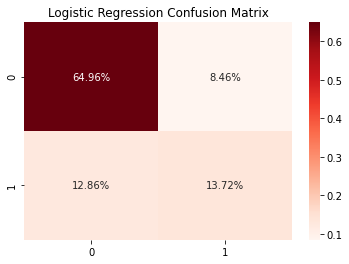

In [123]:
# Confusion matrix of a predictive model for Logistic Regression

cm1 = confusion_matrix(y_test, pred_lr)
print(cm1)
sns.heatmap(cm1 / np.sum(cm1), annot = True, fmt = '0.2%', cmap = "Reds")
plt.title("Logistic Regression Confusion Matrix", fontsize = 12)
plt.show()

In [107]:
# Evaluate a predictive model for Decision Tree

In [108]:
# Classification report of a predictive model for Decision Tree

print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.56      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407



[[856 177]
 [145 229]]


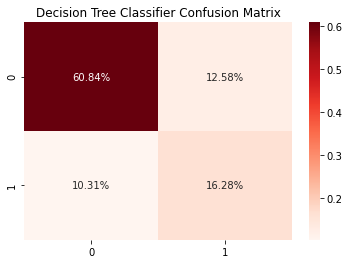

In [124]:
# Confusion matrix of a predictive model for Decision Tree

cm2 = confusion_matrix(y_test, pred_dt)
print(cm2)
sns.heatmap(cm2 / np.sum(cm2), annot = True, fmt = '0.2%', cmap = 'Reds')
plt.title("Decision Tree Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [110]:
# Evaluate a predictive model for Random Forest

In [111]:
# Classification report of a predictive model for Random Forest

print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



[[1033    0]
 [ 374    0]]


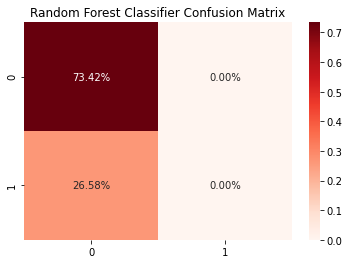

In [125]:
# Confusion matrix of a predictive model for Random Forest

cm3 = confusion_matrix(y_test, pred_rf)
print(cm3)
sns.heatmap(cm3 / np.sum(cm3), annot = True, fmt = '0.2%', cmap = 'Reds')
plt.title("Random Forest Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [113]:
# Evaluate a predictive model for KNeighbours

In [114]:
# Classification report of a predictive model for KNeighbours

print(classification_report(y_test, pred_kn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1033
           1       0.54      0.52      0.53       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407



[[871 162]
 [181 193]]


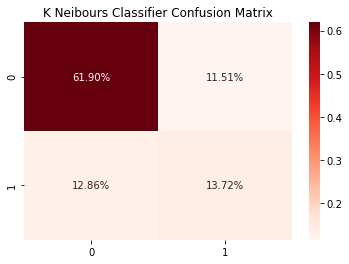

In [127]:
# Confusion matrix of a predictive model for KNeighbours

cm4 = confusion_matrix(y_test, pred_kn)
print(cm4)
sns.heatmap(cm4 / np.sum(cm4), annot = True, fmt = '0.2%', cmap = 'Reds')
plt.title("K Neibours Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [116]:
# Evaluate a predictive model for Support Vector Machine

In [117]:
# Classification report of a predictive model for Support Vector Machine

print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



[[928 105]
 [200 174]]


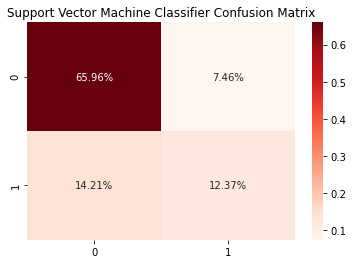

In [128]:
# Confusion matrix of a predictive model for Support Vector Machine

cm5 = confusion_matrix(y_test, pred_svm)
print(cm5)
sns.heatmap(cm5 / np.sum(cm5), annot = True, fmt = '0.2%', cmap = 'Reds')
plt.title("Support Vector Machine Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [119]:
# Evaluate a predictive model for AdaBoost

In [120]:
# Classification report of a predictive model for AdaBoost

print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



[[1033    0]
 [ 374    0]]


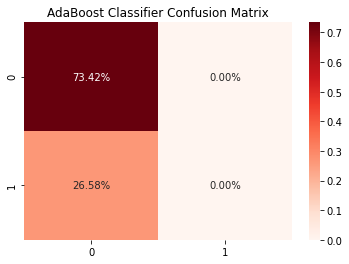

In [129]:
# Confusion matrix of a predictive model for AdaBoost

cm6 = confusion_matrix(y_test, pred_ada)
print(cm6)
sns.heatmap(cm6 / np.sum(cm6), annot = True, fmt = '0.2%', cmap = 'Reds')
plt.title("AdaBoost Classifier Confusion Matrix", fontsize = 12)
plt.show()